In [2]:
import pandas as pd

import numpy as np
from folium import plugins, Map
from folium.plugins import HeatMap
import mpld3

In [35]:
df_all_311 = pd.read_csv('311_requests_alltime.csv', low_memory=False)
df_all_311 = df_all_311.fillna(0)


In [23]:
df_all_311

case_enquiry_id              open_dt            target_dt  \
0           101004625277  2023-01-09 18:55:59  2023-03-16 08:30:00   
1           101004666905  2023-02-13 17:21:00  2024-02-13 17:21:00   
2           101004740172  2023-03-16 13:44:00                    0   
3           101004680574  2023-02-16 13:34:00  2024-02-16 13:34:44   
4           101004727845  2023-03-14 16:55:00  2023-03-16 16:55:16   
...                  ...                  ...                  ...   
2525781     101000369425  2011-12-31 21:11:56                    0   
2525782     101000369427  2011-12-31 21:40:22  2012-01-05 08:30:00   
2525783     101000369428  2011-12-31 22:25:24  2012-01-30 22:25:24   
2525784     101000369429  2011-12-31 22:51:19  2012-01-30 22:51:19   
2525785     101000369430  2011-12-31 23:11:06  2012-01-17 08:30:00   

                   closed_dt   ontime case_status  \
0                          0  OVERDUE        Open   
1                          0   ONTIME        Open   
2                          0   ONTIME        Open   
3                          0   ONTIME        Open   
4                          0  OVERDUE        Open   
...                      ...      ...         ...   
2525781  2011-12-31 21:38:16   ONTIME      Closed   
2525782  2012-01-01 07:40:34   ONTIME      Closed   
2525783  2012-01-03 10:24:21   ONTIME      Closed   
2525784  2012-01-03 12:57:56   ONTIME      Closed   
2525785  2012-01-24 13:43:20  OVERDUE      Closed   

                                            closure_reason  \
0                                                            
1                                                            
2                                                            
3                                                            
4                                                            
...                                                    ...   
2525781  Case Closed Case Resolved GM2 making a sweep o...   
2525782  Case Closed Case Resolved at that location sid...   
2525783           Case Closed VIOCOR: Violation Corrected    
2525784       Case Closed ADCLSD: Administratively Closed    
2525785               Case Closed Case Resolved completed    

                                case_title                        subject  \
0                         Graffiti Removal            Property Management   
1                        New Tree Requests  Parks & Recreation Department   
2              Schedule a Bulk Item Pickup        Public Works Department   
3                        New Tree Requests  Parks & Recreation Department   
4        Unsanitary Conditions - Employees          Inspectional Services   
...                                    ...                            ...   
2525781                Highway Maintenance        Public Works Department   
2525782        Sidewalk Repair (Make Safe)        Public Works Department   
2525783     Heat - Excessive  Insufficient          Inspectional Services   
2525784     Heat - Excessive  Insufficient          Inspectional Services   
2525785               Street Light Outages        Public Works Department   

                      reason  ... police_district        neighborhood  \
0                   Graffiti  ...              B2             Roxbury   
1                      Trees  ...              D4             Roxbury   
2                 Sanitation  ...             C11          Dorchester   
3                      Trees  ...             E13       Jamaica Plain   
4                     Health  ...              A1              Boston   
...                      ...  ...             ...                 ...   
2525781  Highway Maintenance  ...              D4            Back Bay   
2525782  Highway Maintenance  ...             D14  Allston / Brighton   
2525783              Housing  ...              B3    Greater Mattapan   
2525784              Housing  ...              B3    Greater Mattapan   
2525785        Street Lights  ...              B3         

In [24]:
df_all_311_precinct = df_all_311.groupby('precinct').count()
df_all_311_precinct

case_enquiry_id  open_dt  target_dt  closed_dt  ontime  case_status  \
precinct                                                                        
0                    1680     1680       1680       1680    1680         1680   
                    60827    60827      60827      60827   60827        60827   
0101                12838    12838      12838      12838   12838        12838   
0102                 8048     8048       8048       8048    8048         8048   
0103                14413    14413      14413      14413   14413        14413   
...                   ...      ...        ...        ...     ...          ...   
2209                 8314     8314       8314       8314    8314         8314   
2210                 9448     9448       9448       9448    9448         9448   
2211                 5896     5896       5896       5896    5896         5896   
2212                 6553     6553       6553       6553    6553         6553   
2213                 4808     4808       4808       4808    4808         4808   

          closure_reason  case_title  subject  reason  ...  \
precinct                                               ...   
0                   1680        1680     1680    1680  ...   
                   60827       60827    60827   60827  ...   
0101               12838       12838    12838   12838  ...   
0102                8048        8048     8048    8048  ...   
0103               14413       14413    14413   14413  ...   
...                  ...         ...      ...     ...  ...   
2209                8314        8314     8314    8314  ...   
2210                9448        9448     9448    9448  ...   
2211                5896        5896     5896    5896  ...   
2212                6553        6553     6553    6553  ...   
2213                4808        4808     4808    4808  ...   

          city_council_district  police_district  neighborhood  \
precinct                                                         
0                          1680             1680          1680   
                          60827            60827         60827   
0101                      12838            12838         12838   
0102                       8048             8048          8048   
0103                      14413            14413         14413   
...                         ...              ...           ...   
2209                       8314             8314          8314   
2210                       9448             9448          9448   
2211                       5896             5896          5896   
2212                       6553             6553          6553   
2213                       4808             4808          4808   

          neighborhood_services_district   ward  location_street_name  \
precinct                                                                
0                                   1680   1680                  1680   
                                   60827  60827                 60827   
0101                               12838  12838                 12838   
0102                                8048   8048                  8048   
0103                               14413  14413                 14413   
...                                  ...    ...                   ...   
2209                                8314   8314                  8314   
2210                                9448   9448                  9448   
2211                                5896   5896                  5896   
2212                                6553   6553                  6553   
2213                                4808   4808                  4808   

          location_zipcode  latitude  longitude  source  
precinct                                                 
0                     1680      1680       1680    1680  
                     60827     60827      60827   60827  
0101                 12838     12838      12838   12838  
0102                  8048      8048       8048   

In [25]:
#total number of 311 requests
Total_cases = df_all_311_precinct['case_enquiry_id'].sum()
Total_cases



2525786

In [26]:
df_all_311.count()

case_enquiry_id                   2525786
open_dt                           2525786
target_dt                         2525786
closed_dt                         2525786
ontime                            2525786
case_status                       2525786
closure_reason                    2525786
case_title                        2525786
subject                           2525786
reason                            2525786
type                              2525786
queue                             2525786
department                        2525786
submittedphoto                    2525786
closedphoto                       2525786
location                          2525786
fire_district                     2525786
pwd_district                      2525786
city_council_district             2525786
police_district                   2525786
neighborhood                      2525786
neighborhood_services_district    2525786
ward                              2525786
precinct                          

In [27]:
xl = pd.ExcelFile('./census_data_for_2022_redistricting.xlsx')
xl.sheet_names


['2010', '2020', 'Change 2010-2020', 'Pct Change 2010-2020']

In [28]:
xl.sheet_names
census_df = xl.parse('2010')
census_df = census_df[:276]
census_df.columns=census_df.iloc[0] 
census_df = census_df[1:]
census_df = census_df.fillna(0)
census_df


0   Ward and Precinct (Updated 2022)  Total Population  White alone  \
1                               0101              2047         1200   
2                               0102              2608          968   
3                               0103              3965         1417   
4                               0104              2397          606   
5                               0105              3649         1105   
..                               ...               ...          ...   
271                             2209              2305         1712   
272                             2210              2429         1781   
273                             2211              1545         1043   
274                             2212              2168         1039   
275                             2213              1390         1166   

0    Black or African American  Hispanic or Latino (of any Race)  Asian  \
1                           57                               668     64   
2                           59                              1441     51   
3                          294                              1802    304   
4                           63                              1576     61   
5                           64                              2238     95   
..                         ...                               ...    ...   
271                         43                               115    398   
272                         86                               234    268   
273                        111                               167    183   
274                        225                               502    322   
275                         52                                40    125   

0    American Indian and Alaska Native  \
1                                    9   
2                                    8   
3                                   26   
4                                    9   
5                                    1   
..                                 ...   
271                                  2   
272                                  5   
273                                  3   
274                                 11   
275                                  1   

0    Native Hawaiian and Other Pacific Islander  Some Other Race  \
1                                             0               44   
2                                             0               78   
3                                             9               84   
4                                             0               69   
5                                             1              129   
..                                          ...              ...   
271                                           3               19   
272                                           0               49   
273                                           2               23   
274                                           0               55   
275                                           0                5   

0    Two or More Non-White Races  ...  Correctional Facilities for Adults  \
1                              5  ...                                   0   
2                              3  ...                                   0   
3                             29  ...                                   0   
4                             13  ...                                   0   
5                             16  ...                                   0   
..                           ...  ...                                 ...   
271                           13  ...                                   0   
272                            6  ...                                   0   
273                           13  ...                                   0   
274                           14  ...                                   0   
275                            1  ...                                   0   


In [29]:

census_df['White ratio'] = (census_df['White alone']) / (census_df['Total Population']+1)
census_df['Black ratio'] = (census_df['Black or African American']) / (census_df['Total Population']+1)
census_df['Asian ratio'] = (census_df['Asian']) / (census_df['Total Population']+1)
census_df['Hispanic ratio'] = (census_df['Hispanic or Latino (of any Race)']) / (census_df['Total Population']+1)

census_df['White and Age over 18 ratio'] = (census_df['White alone,\nAge 18 and over']) / (census_df['Total Population,\nAge 18 and over']+1)
census_df['Black and Age over 18 ratio'] = (census_df['Black or African American,\nAge 18 and over']) / (census_df['Total Population,\nAge 18 and over']+1)
census_df['Asian and Age over 18 ratio'] = (census_df['Asian,\nAge 18 and over']) / (census_df['Total Population,\nAge 18 and over']+1)
census_df['Hispanic and Age over 18 ratio'] = (census_df['Hispanic or Latino (of any Race),\nAge 18 and over']) / (census_df['Total Population,\nAge 18 and over']+1)


In [43]:
census_df


0                                Ward and Precinct (Updated 2022)  \
Ward and Precinct (Updated 2022)                                    
0101                                                         0101   
0102                                                         0102   
0103                                                         0103   
0104                                                         0104   
0105                                                         0105   
...                                                           ...   
2209                                                         2209   
2210                                                         2210   
2211                                                         2211   
2212                                                         2212   
2213                                                         2213   

0                                 Total Population  White alone  \
Ward and Precinct (Updated 2022)                                  
0101                                          2047         1200   
0102                                          2608          968   
0103                                          3965         1417   
0104                                          2397          606   
0105                                          3649         1105   
...                                            ...          ...   
2209                                          2305         1712   
2210                                          2429         1781   
2211                                          1545         1043   
2212                                          2168         1039   
2213                                          1390         1166   

0                                 Black or African American  \
Ward and Precinct (Updated 2022)                              
0101                                                     57   
0102                                                     59   
0103                                                    294   
0104                                                     63   
0105                                                     64   
...                                                     ...   
2209                                                     43   
2210                                                     86   
2211                                                    111   
2212                                                    225   
2213                                                     52   

0                                 Hispanic or Latino (of any Race)  Asian  \
Ward and Precinct (Updated 2022)                                            
0101                                                           668     64   
0102                                                          1441     51   
0103                                                          1802    304   
0104                                                          1576     61   
0105                                                          2238     95   
...                                                            ...    ...   
2209                                                           115    398   
2210                                                           234    268   
2211                                                           167    183   
2212                                                           502    322   
2213                                                            40    125   

0                                 American Indian and Alaska Native  \
Ward and Precinct (Updated 2022)                                      
0101                                                              9   
0102                                                              8   
0103                                                             26   
0104                                                 

In [30]:
census_df.index = census_df['Ward and Precinct (Updated 2022)']
census_df.columns

Index(['Ward and Precinct (Updated 2022)', 'Total Population', 'White alone',
       'Black or African American', 'Hispanic or Latino (of any Race)',
       'Asian', 'American Indian and Alaska Native',
       'Native Hawaiian and Other Pacific Islander', 'Some Other Race',
       'Two or More Non-White Races', 'Total Population,\nAge 18 and over',
       'White alone,\nAge 18 and over',
       'Black or African American,\nAge 18 and over',
       'Hispanic or Latino (of any Race),\nAge 18 and over',
       'Asian,\nAge 18 and over',
       'American Indian and Alaska Native,\nAge 18 and over',
       'Native Hawaiian and Other Pacific Islander,\nAge 18 and over',
       'Some Other Race,\nAge 18 and over',
       'Two or More Non-White Races,\nAge 18 and over',
       'Total Group Quarters Population', 'Correctional Facilities for Adults',
       'Juvenile Facilities', 'Nursing Facilities',
       'Other Institutional Facilities',
       'College / University Student Housing', 'Milita

In [12]:

merge_df = pd.merge(df_all_311_precinct, census_df, left_index=True, right_index=True)
merge_df.columns

Index(['case_enquiry_id', 'open_dt', 'target_dt', 'closed_dt', 'ontime',
       'case_status', 'closure_reason', 'case_title', 'subject', 'reason',
       'type', 'queue', 'department', 'submittedphoto', 'closedphoto',
       'location', 'fire_district', 'pwd_district', 'city_council_district',
       'police_district', 'neighborhood', 'neighborhood_services_district',
       'ward', 'location_street_name', 'location_zipcode', 'latitude',
       'longitude', 'source', 'Ward and Precinct (Updated 2022)',
       'Total Population', 'White alone', 'Black or African American',
       'Hispanic or Latino (of any Race)', 'Asian',
       'American Indian and Alaska Native',
       'Native Hawaiian and Other Pacific Islander', 'Some Other Race',
       'Two or More Non-White Races', 'Total Population,\nAge 18 and over',
       'White alone,\nAge 18 and over',
       'Black or African American,\nAge 18 and over',
       'Hispanic or Latino (of any Race),\nAge 18 and over',
       'Asian,\nAge 1

In [42]:
merge_df

case_enquiry_id  open_dt  target_dt  closed_dt  ontime  case_status  \
0101            12838    12838      11561      11870   12836        12838   
0102             8048     8048       7010       7422    8047         8048   
0103            14413    14413      12691      13322   14410        14413   
0104            13982    13982      12761      12932   13980        13982   
0105            11377    11377       9972      10642   11374        11377   
...               ...      ...        ...        ...     ...          ...   
2209             8314     8314       7189       7873    8313         8314   
2210             9448     9448       7877       8855    9448         9448   
2211             5896     5896       4767       5466    5894         5896   
2212             6553     6553       5534       5844    6550         6553   
2213             4808     4808       3922       4492    4808         4808   

      closure_reason  case_title  subject  reason  ...  \
0101           12838       12831    12838   12838  ...   
0102            8048        8048     8048    8048  ...   
0103           14413       14413    14413   14413  ...   
0104           13982       13981    13982   13982  ...   
0105           11377       11374    11377   11377  ...   
...              ...         ...      ...     ...  ...   
2209            8314        8314     8314    8314  ...   
2210            9448        9447     9448    9448  ...   
2211            5896        5895     5896    5896  ...   
2212            6553        6552     6553    6553  ...   
2213            4808        4808     4808    4808  ...   

      Occupied Housing Units  Vacant Housing Units  White ratio  Black ratio  \
0101                     890                   112     0.585938     0.027832   
0102                     937                    80     0.371023     0.022614   
0103                    1721                   119     0.357287      0.07413   
0104                     849                    70     0.252711     0.026272   
0105                    1281                   105      0.30274     0.017534   
...                      ...                   ...          ...          ...   
2209                     935                    51     0.742411     0.018647   
2210                    1027                    34     0.732922     0.035391   
2211                     600                    29     0.674644     0.071798   
2212                     772                    20     0.479023     0.103734   
2213                     549                    26     0.838246     0.037383   

      Asian ratio  Hispanic ratio  White and Age over 18 ratio  \
0101      0.03125        0.326172                     0.625146   
0102     0.019548        0.552319                     0.399614   
0103     0.076652        0.454362                     0.400943   
0104     0.025438        0.657214                     0.271186   
0105     0.026027        0.613151                      0.33541   
...           ...             ...                          ...   
2209     0.172593         0.04987                     0.741951   
2210     0.110288        0.096296                      0.75733   
2211      0.11837        0.108021                     0.721125   
2212     0.148456        0.231443                      0.54827   
2213     0.089863        0.028756                     0.849488   

      Black and Age over 18 ratio  Asian and Age over 18 ratio  \
0101                     0.025611                     0.030268   
0102                     0.023649                      0.02027   
0103                     0.070126                     0.076101   
0104                     0.023835                     0.023305   
0105                     0.017999                      0.02873   
...                           ...                          ...   
2209                     0.021298                     0.171372   
2210                     0.034732                     0.105097   
2211                     0.052432   

In [41]:
print("Correlation between 311 requests and different races in Boston")

cols = ['White ratio', 'Asian ratio', 'Black ratio', 'Hispanic ratio']

for col in cols:
    print(f"{col}:", merge_df['case_enquiry_id'].corr(merge_df[col], method='spearman'))

print()
print("Correlation between 311 requests and different races over 18 years old in Boston")
lists = ['White and Age over 18 ratio', 'Asian and Age over 18 ratio', 'Black and Age over 18 ratio', 'Hispanic and Age over 18 ratio']

for list in lists:
    print(f"{list}:", merge_df['case_enquiry_id'].corr(merge_df[list], method='spearman'))

Correlation between 311 requests and different races in Boston
White ratio: 0.24699901466905372
Asian ratio: 0.0415170048336827
Black ratio: -0.2938322327721622
Hispanic ratio: -0.13350190448660412

Correlation between 311 requests and different races over 18 years old in Boston
White and Age over 18 ratio: 0.24319641681458473
Asian and Age over 18 ratio: 0.041047218098456004
Black and Age over 18 ratio: -0.29234786234169063
Hispanic and Age over 18 ratio: -0.12997483431595136


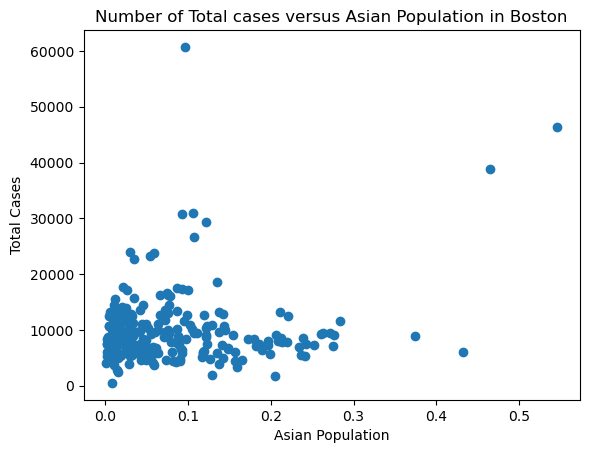

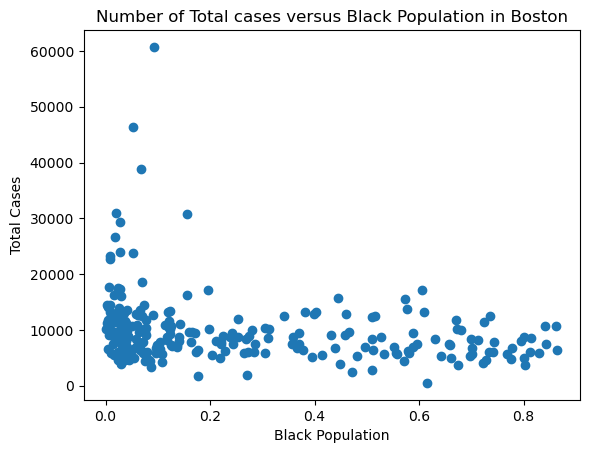

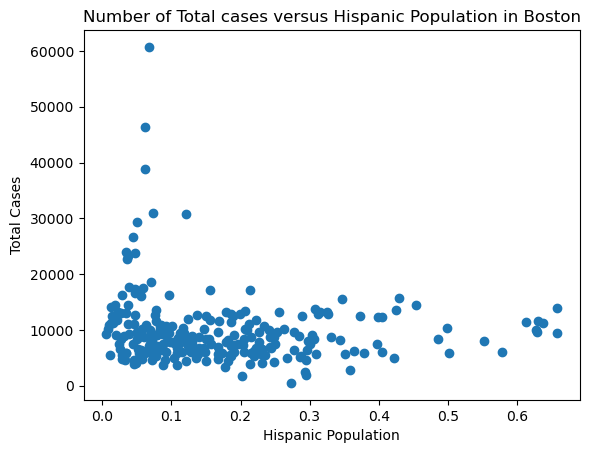

In [33]:
import matplotlib.pyplot as plt

demographics = ['White', 'Asian', 'Black', 'Hispanic']

for demo in demographics:
    plt.scatter(merge_df[demo + ' ratio'], merge_df['case_enquiry_id'])
    plt.xlabel(demo + ' Population')
    plt.ylabel('Total Cases')
    plt.title('Number of Total cases versus ' + demo + ' Population in Boston')
    plt.show()


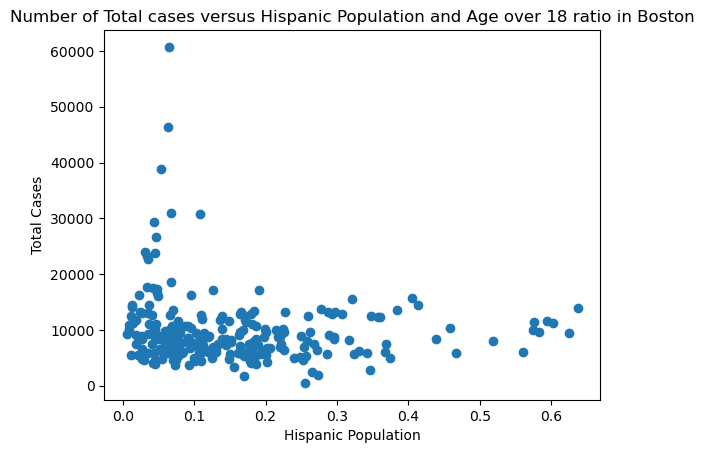

In [34]:
import matplotlib.pyplot as plt

demographics = ['White', 'Asian', 'Black', 'Hispanic']

for demo in demographics:
    plt.scatter(merge_df[demo + ' and Age over 18 ratio'], merge_df['case_enquiry_id'])
    plt.xlabel(demo + ' Population')
    plt.ylabel('Total Cases')
    plt.title('Number of Total cases versus ' + demo + ' Population and Age over 18 ratio in Boston')
    plt.show()

In [19]:
import seaborn as sns

#sns.pairplot(data=merge_df, vars=['White ratio', 'Black ratio', 'Asian ratio', 'Hispanic ratio', 'case_enquiry_id'])
#plt.show()



In [20]:

default_location=[42.360081, -71.058884]
zoom_start =  12
base_map = Map(location = default_location, zoom_start = zoom_start)


df_all_311['latitude'] = df_all_311['latitude'].astype(float)
df_all_311['longitude'] = df_all_311['longitude'].astype(float)
#df_all_311['precinct'] = df_all_311['precinct'].astype(float)
mean = df_all_311.groupby(['latitude', 'longitude'], as_index=False)['case_enquiry_id'].mean()
HeatMap(mean, min_opacity=0.2, radius=15).add_to(base_map)
base_map